In [ ]:
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)
COLAB = True 
print('Note: using Google CoLab')
%tensorflow_version 2.X

Mounted at /content/drive
Note: using Google CoLab
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/NLP Dataset/twcs/twcs.csv'


EDA

In [ ]:
import pandas as pd


In [ ]:
ds = pd.read_csv(path)
ds.head()


,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811774 entries, 0 to 2811773
Data columns (total 7 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tweet_id                 int64  
 1   author_id                object 
 2   inbound                  bool   
 3   created_at               object 
 4   text                     object 
 5   response_tweet_id        object 
 6   in_response_to_tweet_id  float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 131.4+ MB


In [ ]:
ds.describe()

,tweet_id,in_response_to_tweet_id
count,2.811774e+06,2.017439e+06
mean,1.504565e+06,1.463141e+06
std,8.616450e+05,8.665730e+05
min,1.000000e+00,1.000000e+00
25%,7.601652e+05,7.155105e+05
50%,1.507772e+06,1.439805e+06
75%,2.253296e+06,2.220646e+06
max,2.987950e+06,2.987950e+06


In [ ]:
ds.drop('tweet_id', axis = 1, inplace = True)
ds.drop('created_at', axis = 1, inplace = True)
ds = ds[~ds['text'].isnull()]

def preprocess(CleanText):
    CleanText = CleanText.str.replace("(<br/>)", "")
    CleanText = CleanText.str.replace('(<a).*(>).*(</a>)', '')
    CleanText = CleanText.str.replace('(&amp)', '')
    CleanText = CleanText.str.replace('(&gt)', '')
    CleanText = CleanText.str.replace('(&lt)', '')
    CleanText = CleanText.str.replace('(\xa0)', ' ')  
    return CleanText

ds['text'] = preprocess(ds['text'])

KeyError: ignored

In [ ]:
ds['word_count'] = ds['text'].apply(lambda x: len(str(x).split(" ")))
ds[['text','word_count']].head(5)

,text,word_count
0,@115712 I understand. I would like to assist y...,23
1,@sprintcare and how do you propose we do that,9
2,@sprintcare I have sent several private messag...,14
3,@115712 Please send us a Private Message so th...,23
4,@sprintcare I did.,3


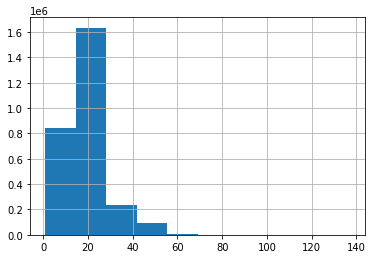

In [ ]:
# Let us take a look at distribution of words in each tweet
ds.text.str.split().\
    map(lambda x: len(x)).\
    hist()

We can see here that most of the tweets contain 5 to 25 words while there are a few tweets having a word count above 25

**Number of characters in the tweets**

In [ ]:
# Finding the number of characters in each tweet incuding the spaces
ds['char_count'] = ds['text'].str.len() 
ds[['text','char_count']].head()

,text,char_count
0,@115712 I understand. I would like to assist y...,121
1,@sprintcare and how do you propose we do that,45
2,@sprintcare I have sent several private messag...,82
3,@115712 Please send us a Private Message so th...,124
4,@sprintcare I did.,18


**Distribution of character count of the tweets**

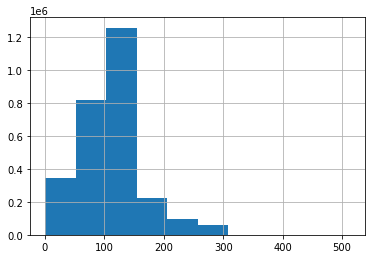

In [ ]:
# Plotting the character count for the tweets
ds.text.str.len().hist()

We can see here that most of the tweets have a range of 50 to 150 characters, while very few tweets have 200 or more characters.

**Stopwords in the tweets**